### Assignment 6

#### Name: Eve Tarpey Date: 22/01/24
----------------------------------------------------------------------------------------------------------------------------
### Background:

The average temperature of the Earth is set by balancing the amount of energy received from the sun with the amount of energy that the Earth radiates. As shown in the background slides, this calculation can be carried out very simply to find a first estimate for the temperature, but then becomes more complex as it is refined to account for the effects of the atmosphere.


The luminosity of the sun, $ L_\odot $ is intercepted by the earth, radius $R_E$ at a distance D from the sun. 
\
The total received power is $$ P_{in} = \frac{L_\odot}{4 \pi D^2}\pi R_E^2 $$
where the second term is the cross-sectional area of the Earth. 
\
If the Earth were a perfect blackbody, it would then emit energy according to the Stefan-Boltzmann law.
$$P_{out} = 4 \pi R_E^2 \sigma T^4 $$
------------------------------------------------------------------------------------------------------------------------

#### Task 1: Determine the equilibrium temperature of this most basic model Earth, giving the answer in Kelvin and in celsius. 
\
Adopt $L = 3.828 × 10^{26} J s^{−1} $, $D = 1.496 × 10^{11} m$ and $\sigma = 5.67 \times 10^{-8} W/m^2/K^4$.

$$ P_{in} = \frac{L_\odot}{4 \pi D^2}\pi R_E^2 $$

$$ P_{out} = 4 \pi R_E^2 \sigma T^4 $$

Equilibrium temperature: $$ P_{in} = P_{out} $$
\
$ \therefore$ $$ \frac{L_\odot}{4 \pi D^2}\pi R_E^2 = 4 \pi R_E^2 \sigma T^4 $$
$ \therefore$ $$ \frac{L_\odot}{4 \pi D^2} = 4 \sigma T^4 $$
$ \therefore$ $$ \frac{L_\odot}{16 \sigma \pi D^2} = T^4 $$
$ \therefore$ (!)$$ T = \sqrt[4]{\frac{L_\odot}{16 \sigma \pi D^2}} $$  

In [2]:
import matplotlib.pyplot as plt                            # to plot and display graphs
import numpy as np                                         # to perform mathematical operations

L = 3.828E26                                               # luminosity of the sun, unit: J/s
D = 1.496E11                                               # distamce from sun, unit: m
sigma = 5.67E-8                                            # Stefan-Boltsmann constant, unit: W/m^2/K^4

T_K = ((L) / (16 * sigma * np.pi * (D**2)))**(1/4)         # using the equation (!) above to find the temperature in Kelvin

T_C = T_K - (273.15)                                       # subtract by 273.15 K to find the temperature in Celcius

print(f"Temperature in Kelvin: {T_K:.3f} K")               # print temperature value in Kelvin
print(f"Temperature in Celcius: {T_C:.3f} C")              # print temperature value in Celcius


Temperature in Kelvin: 278.333 K
Temperature in Celcius: 5.183 C


--------------------------------------------------------------
#### Task 2: Find the temperature range expected during Earth's orbit using the Stefan-Boltzmann law:
\
$$T = \sqrt[4]{\frac{L_\odot}{16 \sigma \pi D^2}} $$ 
considering the varying distances between perihelion and aphelion.
\
Perihelion, the point of closest approach to the Sun, occurs at a distance of $$D_p = 147,098,074 \, km = 147,098,074 \times 10^3 m $$
\
While aphelion, the farthest distance from the Sun, is at $$D_a = 152,097,701 \, km = 152,097,701 \times 10^3 \, m$$ 
#### Determine the range of temperatures corresponding to these orbital positions.


In [89]:
D_p = 147098074e3                                          # perihelion distance, unit: m
D_a = 152097701e3                                          # aphelion distance, unit: m

# calculate temperatures at perihelion and aphelion using the Stefan-Boltzmann Law, unit: K
T_p = (L / (16 * sigma * np.pi * D_p**2))**(1/4)

T_a = (L / (16 * sigma * np.pi * D_a**2))**(1/4)

# calculate temperature range to quantify the range in temperatures between perihelion and aphelion
temperature_range = T_p - T_a

# print the range of temperatures and the difference between in Kelvin
print("The range of temperatures corresponding to the orbital positions: {0:3.2f} - {1:3.2f} K".format(T_a, T_p))
print(f"This is a difference of {temperature_range: .2f} K")


The range of temperatures corresponding to the orbital positions: 276.04 - 280.69 K
This is a difference of  4.65 K


In [79]:
# calculates the eccentricity effect: the ratio of the difference in distances to the sum of the distances (D_a and D_p)
eccentricity_effect = (D_a - D_p) / ((D_a + D_p))

# print the calculated temperature range and the eccentricity effect
print(f"Temperature Range: {temperature_range:.2f} K")
print(f"Eccentricity Effect on Temperature Range: {eccentricity_effect:.7f}")


Temperature Range: 4.65 K
Eccentricity Effect on Temperature Range: 0.0167102


The magnitude of 0.0167 suggests that, in this simplified model, the impact of eccentricity on the annual temperature variation is relatively small, therefore the daily temperature variation would be smaller.

#### Task 3: Determine the equilibrium temperature for Venus, Earth and Mars using this improved model and compare with the measured average temperature for each planet.
The Earth is not a perfect blackbody, so the different efficiencies at absorbing and emitting radiation must be included. The absorption efficiency of radiation is usually defined via albedo which is a measure of reflectivity.
\
The average albedo for the Earth is 0.3 and the updated equation for $P_{in}$ is then:
\
\
$$ P_{in} = S_o(1 − \alpha)\pi R_E^2$$
\
Where we now adopt the solar constant: $$ S_o = \frac{L}{4 \pi D^2} = 1370 \, W m^{−2} $$ 
\
\
Similarly, the emissivity, of the Earth is a measure of how well radiation is emitted. The updated equation for $P_{out}$ is then
\
\
$$P_{out} = 4 \pi R_E^2 \sigma T^4$$
\
$$P_{in} = P_{out}$$
\
$$S_o(1 − \alpha)\pi R_E^2 = 4 \pi R_E^2 \sigma T^4$$


Adopt $\epsilon$ = 1 for Earth and Venus, and a value of $\epsilon$ = 0.8 for Mars.

| Planet   | Distance from sun (au) | Albedo | Observed temperature (K) |
| -------- | -----------------------|--------|--------------------------|
| Venus    |    0.72                |  0.72  |          740             |
| Earth    |          1.00          |  0.30  |          288             |
| Mars     |          1.52          |  0.25  |          223             |

\
\
\
\\

In [86]:
au = 1.496e11                                         # astronomical unit, unit: m

# define a function to return the solar constant for each planet
def solar(distance):
    S_0 = L / (4 * np.pi * (distance**2))
    return S_0

# equilibrium temperature function
def equilibrium_temperature(S_0, albedo, emissivity):
    Temperature = ((S_0 * (1 - albedo)) / (4 * sigma * emissivity))**(1/4)
    return Temperature

# planet distances from sun, unit: au
venus_distance = 0.72                                  
earth_distance = 1.00                                  
mars_distance = 1.52                                   

# define the solar constants for each planet, unit: W/m^2
S_venus = solar(venus_distance * au)
S_earth = solar(earth_distance * au)
S_mars = solar(mars_distance * au)

# calculate equilibrium temperatures for each planet
Temperature_venus = equilibrium_temperature(S_venus, 0.72, 1)
Temperature_earth = equilibrium_temperature(S_earth, 0.30, 1)
Temperature_mars = equilibrium_temperature(S_mars, 0.25, 0.8)

# print the results
print(f"Equilibrium temperature of Venus: {Temperature_venus: .2f} K")
print(f"Equilibrium temperature of Earth: {Temperature_earth: .2f} K")
print(f"Equilibrium temperature of Mars: {Temperature_mars: .2f} K")


Equilibrium temperature of Venus:  238.61 K
Equilibrium temperature of Earth:  254.59 K
Equilibrium temperature of Mars:  222.14 K


Here, we see that the equilibrium temperature of Venus is very incorrect when looking at the observed temperature. This is due to the greenhouse effect due to carbon dioxide and other gases that cannot be accounted for so easily.


For Earth, determine by trial and error, an estimated value of $\epsilon$ that will lead to the correct observed average temperature.

In [87]:
# function to return the correct average temperature of Earth
def Correct_avg_temperature(S_0, albedo, emissivity):
    Temperature = ((S_0 * (1 - albedo)) / (4 * sigma * emissivity))**(1/4)
    return Temperature

# using trial and error, find the closest value of epsilon that will return 288 K
Correct_temperature_earth = Correct_avg_temperature(S_earth, 0.30, 0.61)

# print the results
print(f"Correct observed average temperature of Earth: {Correct_temperature_earth: .2f} K +/- 0.1 K")


Correct observed average temperature of Earth:  288.08 K +/- 0.1 K


---------------------------------------------------
#### Task 4: Determine the radiative forcing and the temperature change, caused by $CO_2$ crossing the 400 parts per million milestone recently.

To determine the effects of changing the greenhouse gas concentrations in the atmosphere, radiative forcing is used which is a measure of the change in trapped radiation due to a change in concentration from $C_0$ to $C$.
\
$$ (1) \Delta F = A \, ln (\frac{C}{C_0}) $$
\
For $CO_2$, the value of A = 5.35 and the reference concentration of $C_0$ is 278 parts per million, from the year 1750.
\
The temperature change, $\Delta T$ is related to the radiative forcing $\Delta F$ by the following relationship:
\
\
$$(2)\Delta T = B \frac{T \Delta F}{S_0(1 − \alpha)}$$
Where B = 1.7

In [58]:
A = 5.35                                             # radiative forcing constant
B = 1.7                                              # temperature change estimated constant
C_0 = 278                                            # reference concentration of carbon dioxide, unit: parts per million
C = 400                                              # concentration recently, unit: parts per million
Avg_temp_earth = 288                                 # observed average temperature of Earth, unit: K

# calculate the radiative forcing and temperature change using equation (1) and (2) above, respectively
delta_F = A * np.log(C/C_0)                

delta_T = B * ((Avg_temp_earth * delta_F)/(S_earth*(1 - 0.3)))

# print the results
print(f"Radiative forcing: {delta_F:.2f} W/m^2")
print(f"Temperature change: {delta_T: .1f} K")


Radiative forcing: 1.95 W/m^2
Temperature change:  1.0 K


#### Task 5: Make a plot of $CO_2$ vs time, and then to make a plot of past modelled temperature versus time, using the 1991 start date as a baseline. Estimate the possible $CO_2$ and the temperature that will result in 2050 if current trends continue.

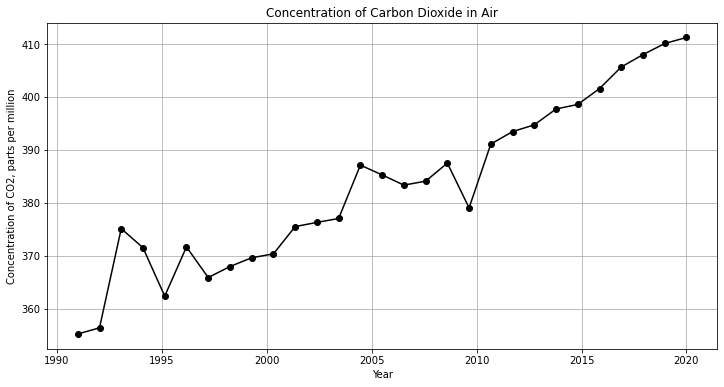

In [85]:
# generate arrays for the years 1991-2019 and 1991-2052 to make predictions
past_years = np.linspace(1991, 2020, num=29)
prediction_years = np.linspace(1991, 2050, num=59)

# list the mean concentration data for each year, which was calculated
mean_concentration = np.array([355.19, 356.35, 375.10, 371.49, 362.34, 371.65, 365.86, 367.94, 369.60, 370.33, 375.49, 376.28, 
                    377.02, 387.11, 385.26, 383.33, 384.07, 387.49, 379.03, 391.09,
                    393.45, 394.72, 397.72, 398.58, 401.58, 405.66, 408.00, 410.10, 411.24])


# to make a plot of CO2 vs time
plt.figure(figsize=(12, 6))                              # to enlarge the graph

plt.plot(past_years, mean_concentration, 'ko-')          # plot the concentration of CO2 against time
plt.xlabel('Year')                                       # label the x axis
plt.ylabel('Concentration of CO2, parts per million')    # label the y axis
plt.title('Concentration of Carbon Dioxide in Air')      # title the graph
plt.grid()                                               # to display a grid 
plt.show()                                               # to show the graph


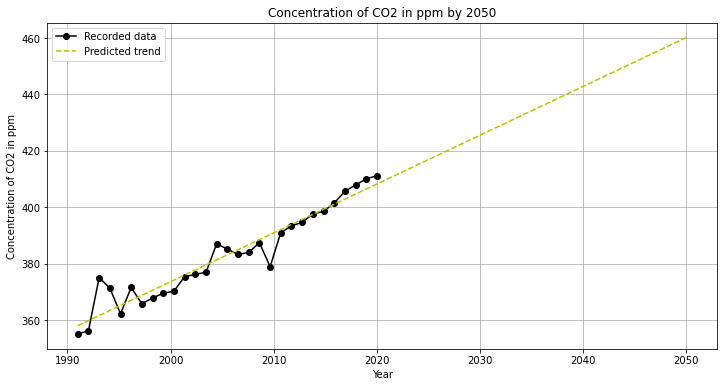

Estimated concentration of CO2 in air by 2050: 460.17 ppm


In [84]:
# to plot CO2 vs time of past years and plot a prediction trajectory of CO2 concentration by 2050
plt.figure(figsize=(12, 6))                              # to enlarge the graph

[m, c] = np.polyfit(past_years, mean_concentration, 1)   # fit a linear trendline to predict CO_2 concentration in 2050
prediction_trend_conc = m * prediction_years + c

# plot the recorded data, predicting the trend for 2050 with line of best fit
plt.plot(past_years, mean_concentration, 'ko-', label="Recorded data")
plt.plot(prediction_years, prediction_trend_conc, 'y--', label="Predicted trend")

plt.xlabel("Year")                                        # label the x axis
plt.ylabel("Concentration of CO2 in ppm")                 # label the y axis
plt.title("Concentration of CO2 in ppm by 2050")          # title the graph
plt.legend()                                              # display a legend to distinguish between lines on graph
plt.grid()                                                # to display a grid
plt.show()                                                # to show the graph

# estimate the concentration of CO2 in air by 2050 and print the result
CO2_conc_2050 = np.interp(2050, prediction_years, prediction_trend_conc)
print(f"Estimated concentration of CO2 in air by 2050: {CO2_conc_2050:.2f} ppm")


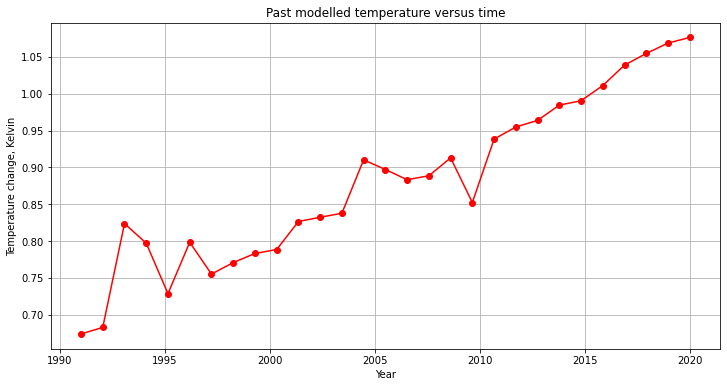

In [83]:
# calculate new radiative forcing and temperature change
delta_F_new = np.zeros(29)
delta_T_new = np.zeros(29)
for i in range(29):
    delta_F_new[i] = A * np.log(mean_concentration[i] /C_0)
    delta_T_new[i] = B * ((Avg_temp_earth * delta_F_new[i])/(S_earth*(1 - 0.3)))
    
plt.figure(figsize=(12, 6))                              # to enlarge the graph

plt.plot(past_years, delta_T_new, 'ro-')                 # plot the concentration of CO2 against time
plt.xlabel("Year")                                       # label the x axis
plt.ylabel("Temperature change, Kelvin")                 # label the y axis
plt.title("Past modelled temperature versus time")       # title the graph
plt.grid()                                               # to display a grid 
plt.show()                                               # to show the graph


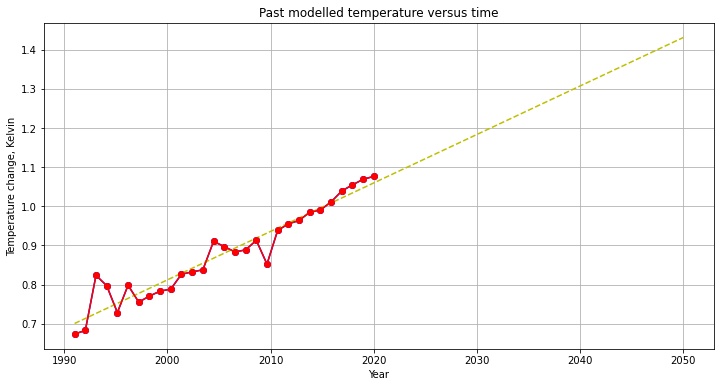

Estimated concentration of CO2 in air by 2050: 1.43 K


In [82]:
# to plot CO2 vs time of past years and plot a prediction trajectory of temperature change by 2050
plt.figure(figsize=(12, 6))                              # to enlarge the graph

[m, c] = np.polyfit(past_years, delta_T_new, 1)          # fit a linear trendline to predict CO_2 concentration in 2050
prediction_trend_conc = m * prediction_years + c

# plot the recorded data, predicting the trend for 2050 with line of best fit
plt.plot(past_years, delta_T_new, 'bo-', label="Recorded data")
plt.plot(prediction_years, prediction_trend_conc, 'y--', label="Predicted trend")

plt.plot(past_years, delta_T_new, 'ro-')                 # plot the change in temperature against time
plt.xlabel("Year")                                       # label the x axis
plt.ylabel("Temperature change, Kelvin")                 # label the y axis
plt.title("Past modelled temperature versus time")       # title the graph
plt.grid()                                               # to display a grid 
plt.show()                                               # to show the graph

# estimate the change in temperature by 2050 and print the result
delta_T_2050 = np.interp(2050, prediction_years, prediction_trend_temp)
print(f"Estimated concentration of CO2 in air by 2050: {delta_T_2050:.2f} K")
